# Student Activity: Financial Forecasting

In this activity, Harold's manager wants Harold to take a look at one year's worth of `TSLA` stock prices and plot a potential stock trajectory for where `TSLA` stock prices could go in the next `3` years. In addition, he would like to know how a $10,000 investment would perform given the simulated results.

Help Harold by creating a Monte Carlo simulation that simulates the next `252 * 3` trading days using three years worth of `TSLA` stock data. Plot the simulated results of `TSLA` daily returns over the next `3` years as well as the corresponding simulated outcomes.

In [33]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import seaborn as sns
from MCForecastTools import MCSimulation
import numpy as np
import pandas_ta as ta
import plotly.graph_objects as go
import yfinance as yf
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get 3 Years Worth of Data via API Call and Read in as DataFrame 

In [3]:
# Set the ticker
ticker = "SQ"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2018-06-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-04", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

ticker_data.head()

SQ                               
                            open   high    low  close    volume
time                                                           
2018-06-04 00:00:00-04:00  60.49  61.49  59.71  61.20   9362778
2018-06-05 00:00:00-04:00  61.36  61.93  60.43  61.56   7312534
2018-06-06 00:00:00-04:00  61.60  62.83  61.08  62.71   7334973
2018-06-07 00:00:00-04:00  62.65  62.77  59.30  60.66  12750382
2018-06-08 00:00:00-04:00  60.58  62.04  60.19  61.78   6963865

### Run the Monte Carlo Simulation

In [4]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_fiveyear = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*3
)

In [5]:
# Run Monte Carlo simulations to forecast three years daily returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5          6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   1.000000   
1    1.017909  1.038887  1.043885  0.955653  1.007708  1.034664   1.001155   
2    1.103262  1.047380  1.017288  0.850829  1.116657  1.063403   0.974869   
3    1.093038  1.053361  1.061351  0.823327  1.138863  1.054552   1.009676   
4    1.076514  1.028547  1.096477  0.764501  1.128584  1.079192   1.009442   
..        ...       ...       ...       ...       ...       ...        ...   
752  4.270427  8.183968  3.669228  1.240232  3.843913  2.638095  11.287940   
753  4.160148  8.392046  3.760151  1.224053  3.888839  2.569002  11.351434   
754  4.047131  8.319990  3.841852  1.193795  3.821946  2.699187  11.300529   
755  4.066791  8.253282  3.719870  1.209824  3.734533  2.819123  11.124858   
756  4.062937  8.112768  3.842363  1.154471  3.675827  2.669189  11.191148   

           7         8         9    ...       990       991       992  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.031460  0.966369  1.012996  ...  1.008215  0.994975  1.003103   
2     1.081640  0.931106  1.024786  ...  0.983837  1.028735  0.997810   
3     1.114293  0.899709  1.025136  ...  0.987300  1.023251  0.997336   
4     1.182714  0.883759  0.967334  ...  0.986190  0.968787  0.998697   
..         ...       ...       ...  ...       ...       ...       ...   
752  21.350726  2.932970  4.630971  ...  3.142459  1.125919  8.138982   
753  21.569578  2.952515  4.597484  ...  3.260976  1.145626  7.751196   
754  21.732223  2.975980  4.699370  ...  3.436458  1.208080  8.514754   
755  22.407097  3.186159  4.634747  ...  3.706650  1.206324  8.564108   
756  21.473317  3.147966  4.670121  ...  4.039193  1.113865  8.484011   

          993       994       995        996        997       998       999  
0    1.000000  1.000000  1.000000   1.000000   1.000000  1.000000  1.000000  
1    1.011182  0.942995  1.043754   1.010222   0.979017  1.013442  1.015533  
2    1.030005  0.966224  1.053129   1.023210   0.987070  0.992397  1.013650  
3    1.025019  0.980158  1.145177   1.000683   0.970031  0.983646  1.025046  
4    0.993608  0.992060  1.106653   0.951348   0.965040  0.935462  1.003712  
..        ...       ...       ...        ...        ...       ...       ...  
752  4.561611  0.854572  0.409635  13.513494  10.618377  2.746512  2.226374  
753  4.476067  0.902709  0.411051  13.656998  10.468398  2.753991  2.213917  
754  4.546394  0.933253  0.386373  13.135734  10.240719  2.726812  2.067525  
755  4.496377  0.879459  0.375917  13.595206  10.187133  2.824825  2.087755  
756  4.647886  0.819336  0.351368  13.984880  10.489294  2.841455  2.092928  

[757 rows x 1000 columns]

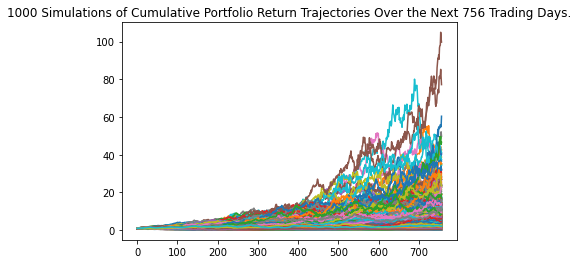

In [6]:
line_plot = MC_fiveyear.plot_simulation()

### Plot the Simulated Daily Returns Trajectory for `TSLA` over the Next Year (252 Trading Days)

In [7]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_fiveyear.simulated_return.mean(axis=1)),
    "median": list(MC_fiveyear.simulated_return.median(axis=1)),
    "min": list(MC_fiveyear.simulated_return.min(axis=1)),
    "max": list(MC_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.000585  1.001634  0.870255  1.154861
2  1.002860  1.000489  0.834193  1.194394
3  1.003617  1.002378  0.823327  1.242343
4  1.005135  1.001087  0.764501  1.249599

<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of AMD Stock Over the Next Year'}>

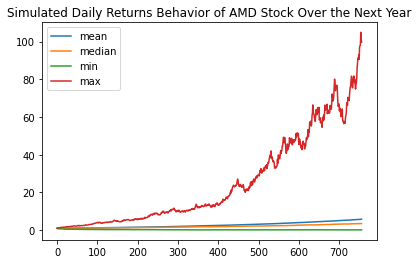

In [8]:
# Use the `plot` function to visually analyze the trajectory of TSLA stock daily returns on the next three years of trading days simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of AMD Stock Over the Next Year")

### Calculate the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next Three Years

In [9]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

mean        median           min           max
0  10000.000000  10000.000000  10000.000000  10000.000000
1  10005.848882  10016.336572   8702.546801  11548.608983
2  10028.602638  10004.889072   8341.933114  11943.942494
3  10036.169052  10023.783013   8233.268429  12423.429939
4  10051.348502  10010.870358   7645.012244  12495.992070

### Plot the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next `252` Trading Days

<AxesSubplot:title={'center':'Simulated Outcomes Behavior of AMD Stock Over the Next Year'}>

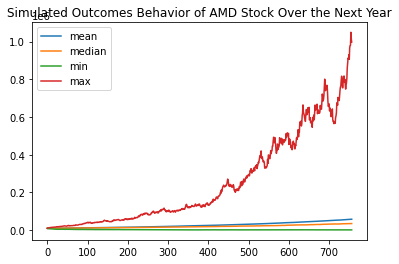

In [10]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title="Simulated Outcomes Behavior of AMD Stock Over the Next Year")

### Calculate the range of the possible outcomes of our $10,000 investments in `TSLA` stocks

In [11]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               5.816934
std                7.643096
min                0.151449
25%                1.683175
50%                3.507328
75%                6.909684
max               99.751939
95% CI Lower       0.463917
95% CI Upper      26.654848
Name: 756, dtype: float64


In [12]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $4639.17 and $266548.48.


<AxesSubplot:xlabel='time'>

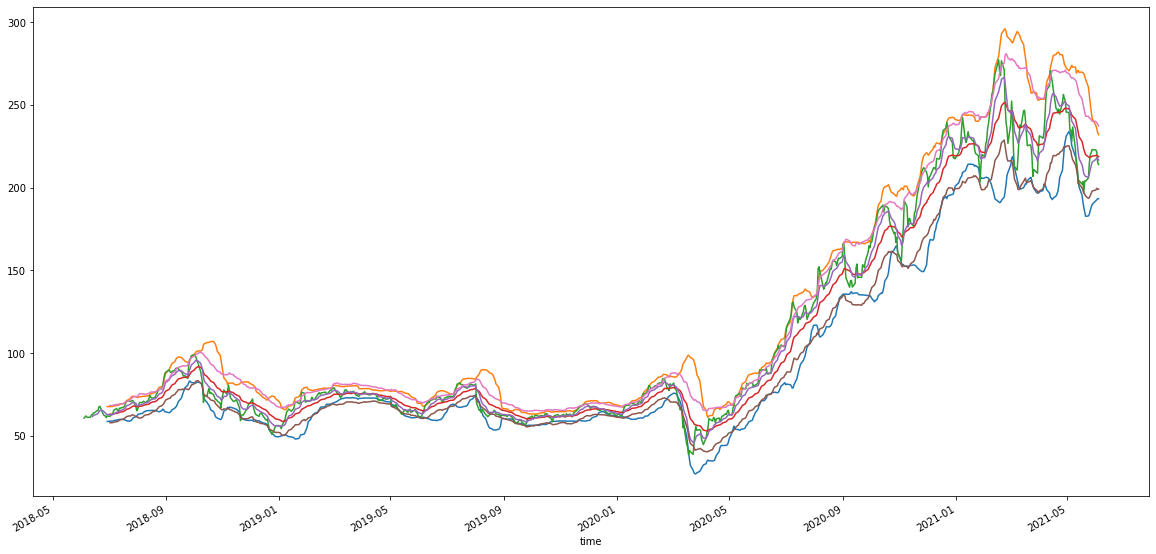

In [13]:
ema21_ohlc4 = ta.ema(ta.ohlc4(ticker_data['SQ']["open"], ticker_data['SQ']["high"], ticker_data['SQ']["low"], ticker_data['SQ']["close"]), length=21)
ema08_ohlc4 = ta.ema(ta.ohlc4(ticker_data['SQ']["open"], ticker_data['SQ']["high"], ticker_data['SQ']["low"], ticker_data['SQ']["close"]), length=8)
#df_closing_prices.plot(figsize = (20,10))
candles = ta.ha(ticker_data['SQ']["open"], ticker_data['SQ']["high"], ticker_data['SQ']["low"], ticker_data['SQ']["close"], offset=None)
bbands = ta.bbands(ticker_data['SQ']["close"], length=20, std=None, mamode=None, offset=None)
squeeze = ta.squeeze(ticker_data['SQ']["high"], ticker_data['SQ']["low"], ticker_data['SQ']["close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr = ta.atr(ticker_data['SQ']["high"], ticker_data['SQ']["low"], ticker_data['SQ']["close"], length=14, mamode="ema", drift=1, offset=0)
kc = ta.kc(ticker_data['SQ']["high"], ticker_data['SQ']["low"],  ticker_data['SQ']["close"], length=21, scalar=2, mamode='ema', offset=0)

fig = plt.figure()
bbands['BBL_20_2.0'].plot(figsize = (20,10))
bbands['BBU_20_2.0'].plot(figsize = (20,10))
candles['HA_close'].plot(figsize = (20,10))
ema21_ohlc4.plot(figsize = (20,10))
ema08_ohlc4.plot(figsize = (20,10))
kc['KCLe_21_2.0'].plot(figsize = (20,10))
kc['KCUe_21_2.0'].plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

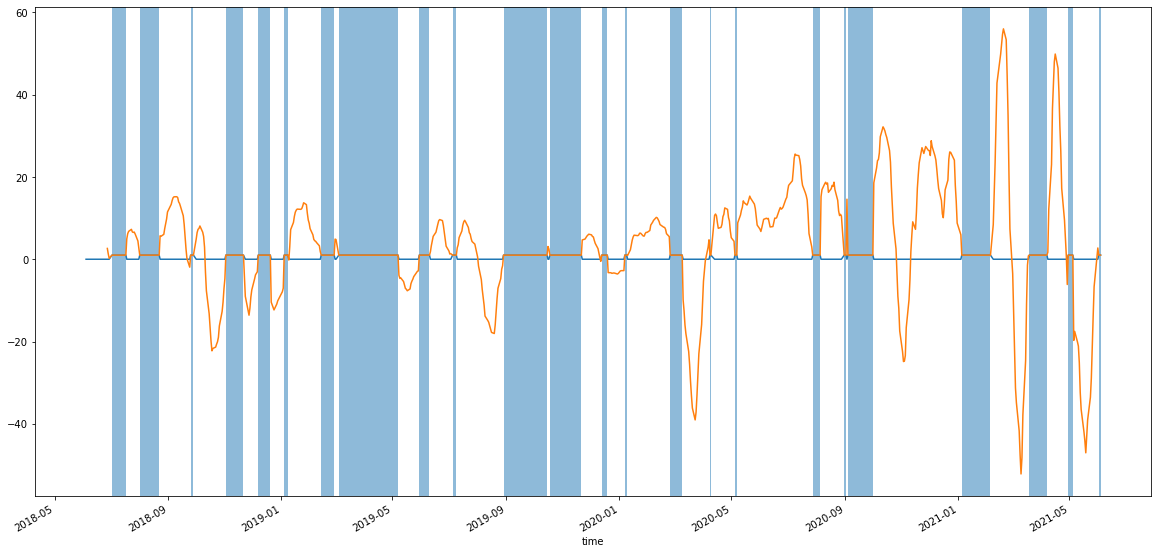

In [14]:
squeeze[squeeze['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(ticker_data['SQ'].index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_dis = plt.plot(ticker_data['SQ'].index, squeeze['SQZ_ON'])
squeeze_on_dis

squeeze['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))

In [21]:
help(ta.adx)

Help on function adx in module pandas_ta.trend.adx:

adx(high, low, close, length=None, scalar=None, drift=None, offset=None, **kwargs)
    Average Directional Movement (ADX)
    
    Average Directional Movement is meant to quantify trend strength by measuring
    the amount of movement in a single direction.
    
    Sources:
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/average-directional-movement-adx/
        TA Lib Correlation: >99%
    
    Calculation:
        DMI ADX TREND 2.0 by @TraderR0BERT, NETWORTHIE.COM
            //Created by @TraderR0BERT, NETWORTHIE.COM, last updated 01/26/2016
            //DMI Indicator
            //Resolution input option for higher/lower time frames
            study(title="DMI ADX TREND 2.0", shorttitle="ADX TREND 2.0")
    
            adxlen = input(14, title="ADX Smoothing")
            dilen = input(14, title="DI Length")
            thold = input(20, title="Threshold")
    
            threshold =

In [15]:
stock = yf.Ticker("SQ")
print(stock.info)

{'zip': '94103', 'sector': 'Technology', 'fullTimeEmployees': 5477, 'longBusinessSummary': 'Square, Inc., together with its subsidiaries, creates tools that enables sellers to accept card payments; also provide reporting and analytics, and next-day settlement. It provides hardware products, including Magstripe reader, which enables swiped transactions of magnetic stripe cards; Contactless and chip reader that accepts Europay, MasterCard, and Visa (EMV) chip cards and Near Field Communication payments; Square Stand, which enables an iPad to be used as a payment terminal or full point of sale solution; Square Register that combines its hardware, point-of-sale software, and payments technology; Square Terminal, a payments device and receipt printer to replace traditional keypad terminals, which accepts tap, dip, and swipe payments. The company also offers various software products, including Square Point of Sale; Square Appointments; Square for Retail; Square for Restaurants; Square Onlin

In [27]:
vix = yf.Ticker("^VIX")
print(vix.info)

{'previousClose': 16.42, 'regularMarketOpen': 17.34, 'twoHundredDayAverage': 21.42326, 'trailingAnnualDividendYield': None, 'payoutRatio': None, 'volume24Hr': None, 'regularMarketDayHigh': 17.35, 'navPrice': None, 'averageDailyVolume10Day': 0, 'totalAssets': None, 'regularMarketPreviousClose': 16.42, 'fiftyDayAverage': 18.919413, 'trailingAnnualDividendRate': None, 'open': 17.34, 'toCurrency': None, 'averageVolume10days': 0, 'expireDate': None, 'yield': None, 'algorithm': None, 'dividendRate': None, 'exDividendDate': None, 'beta': None, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 15.78, 'priceHint': 2, 'currency': 'USD', 'regularMarketVolume': 0, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': None, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 0, 'priceToSalesTrailing12Months': None, 'dayLow': 15.78, 'ask': 0, 'ytdReturn': None, 'askSize': 0, 'volume': 0, 'fiftyTwoWeekHigh': 44.44, 'forwardPE': None, 'maxAge': 1, 

In [16]:
hist = stock.history(period="10y", interval='1mo')
hist.index.duplicated().sum()
hist_stock = hist.loc[~hist.index.duplicated(keep='first')]

In [17]:
hist1 = stock.history(period="10y", interval='1wk')
hist1.index.duplicated().sum()
hist1_stock = hist1.loc[~hist1.index.duplicated(keep='first')]

In [18]:
hist2 = stock.history(period="10y", interval='1d')
hist2.index.duplicated().sum()
hist2_stock = hist2.loc[~hist2.index.duplicated(keep='first')]

In [19]:
hist2_stock.index.duplicated().sum()

0

In [28]:
hist_vix = vix.history(period="1y", interval='1d')
hist_vix.head()

Open       High        Low      Close  Volume  Dividends  \
Date                                                                        
2020-06-08  25.559999  25.980000  24.650000  25.809999       0          0   
2020-06-09  25.930000  27.700001  25.709999  27.570000       0          0   
2020-06-10  26.730000  29.010000  26.059999  27.570000       0          0   
2020-06-11  30.450001  42.580002  29.490000  40.790001       0          0   
2020-06-12  37.680000  44.160000  34.970001  36.090000       0          0   

            Stock Splits  
Date                      
2020-06-08             0  
2020-06-09             0  
2020-06-10             0  
2020-06-11             0  
2020-06-12             0

<AxesSubplot:xlabel='Date'>

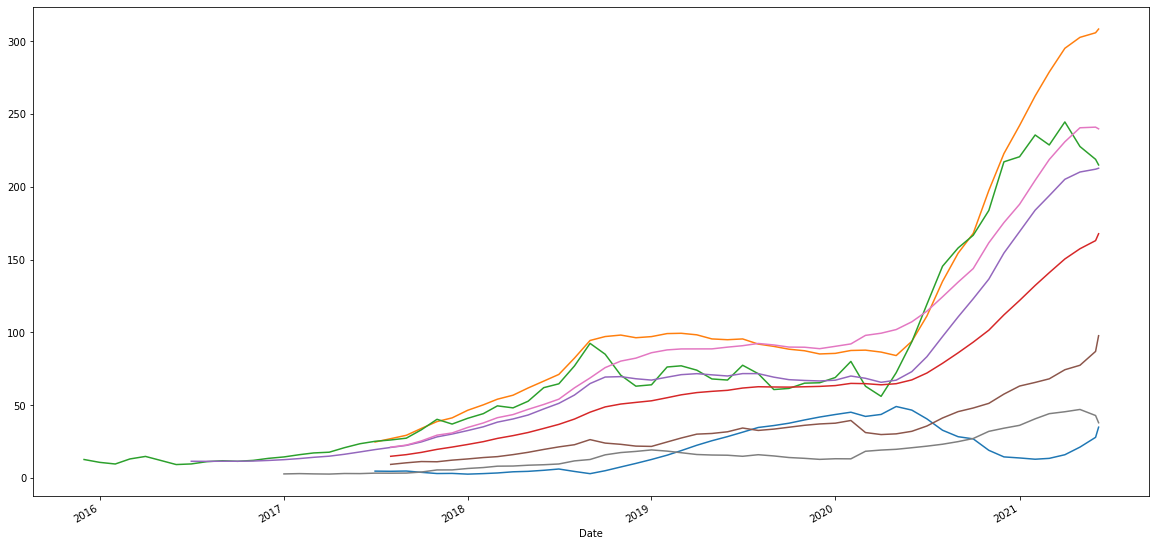

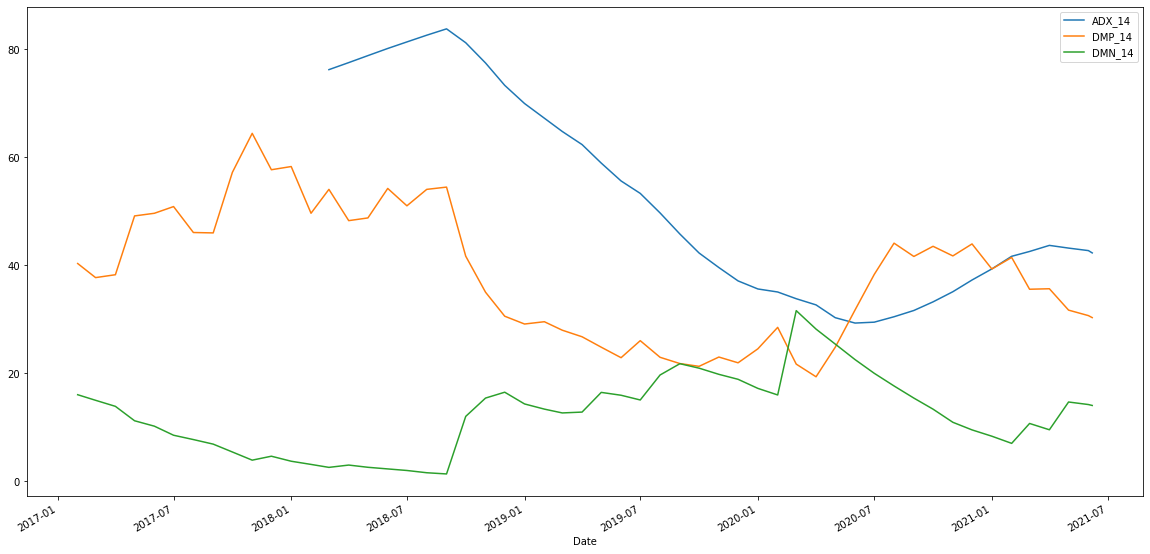

In [20]:
ema21_ohlc4 = ta.ema(ta.ohlc4(hist_stock["Open"], hist_stock["High"], hist_stock["Low"], hist_stock["Close"]), length=21)
ema08_ohlc4 = ta.ema(ta.ohlc4(hist_stock["Open"], hist_stock["High"], hist_stock["Low"], hist_stock["Close"]), length=8)
#df_closing_prices.plot(figsize = (20,10))
candles = ta.ha(hist_stock["Open"], hist_stock["High"], hist_stock["Low"], hist_stock["Close"], offset=None)
bbands = ta.bbands(hist_stock["Close"], length=20, std=None, mamode='ema', offset=None)
squeeze = ta.squeeze(hist_stock["High"], hist_stock["Low"], hist_stock["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr = ta.atr(hist_stock["High"], hist_stock["Low"], hist_stock["Close"], length=14, mamode="ema", drift=1, offset=0)
kc = ta.kc(hist_stock["High"], hist_stock["Low"], hist_stock["Close"], length=21, scalar=2, mamode='ema', offset=0)
adx = ta.adx(hist_stock["High"], hist_stock["Low"], hist_stock["Close"], length=14, scalar=100, drift=1, offset=0)

#fig = plt.figure()
bbands['BBL_20_2.0'].plot(figsize = (20,10))
bbands['BBU_20_2.0'].plot(figsize = (20,10))
candles['HA_close'].plot(figsize = (20,10))
ema21_ohlc4.plot(figsize = (20,10))
ema08_ohlc4.plot(figsize = (20,10))
kc['KCLe_21_2.0'].plot(figsize = (20,10))
kc['KCUe_21_2.0'].plot(figsize = (20,10))
tr.plot(figsize = (20,10))
adx.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

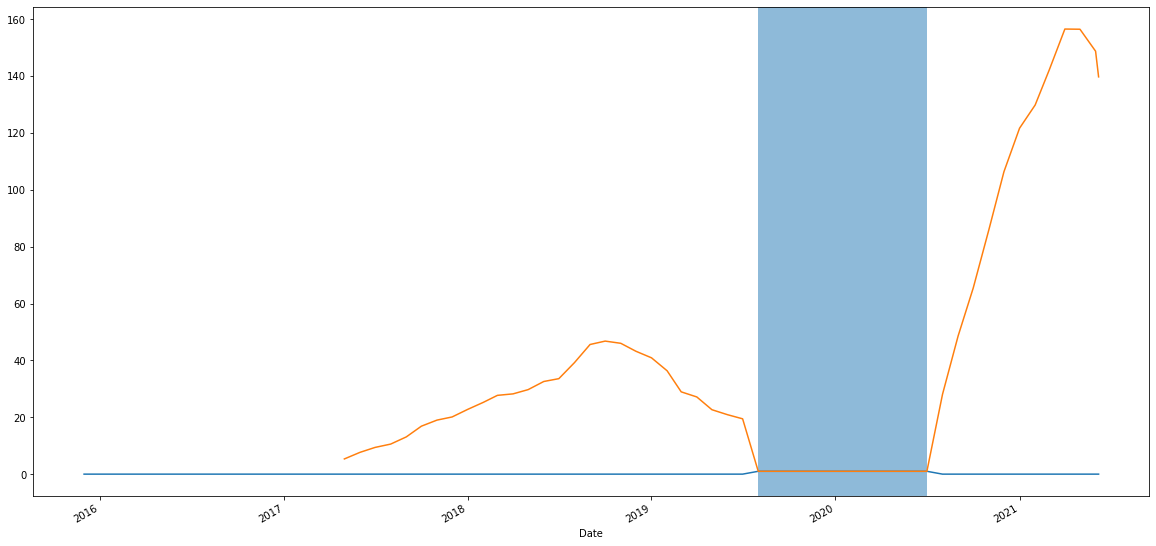

In [21]:
squeeze[squeeze['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(hist_stock.index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_dis = plt.plot(hist_stock.index, squeeze['SQZ_ON'])
squeeze_on_dis

squeeze['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

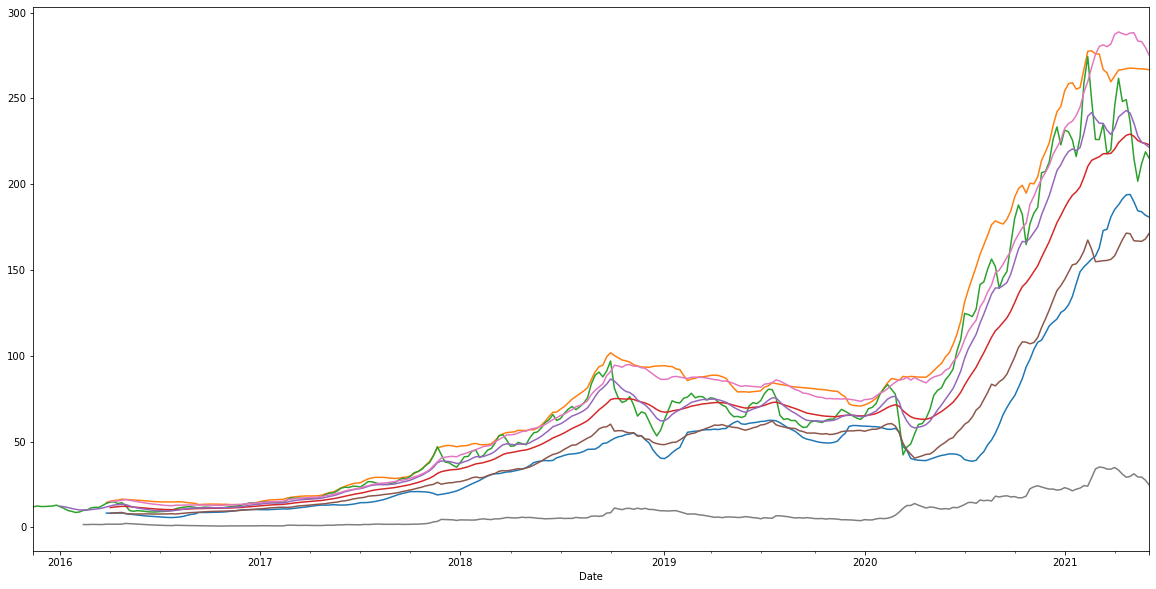

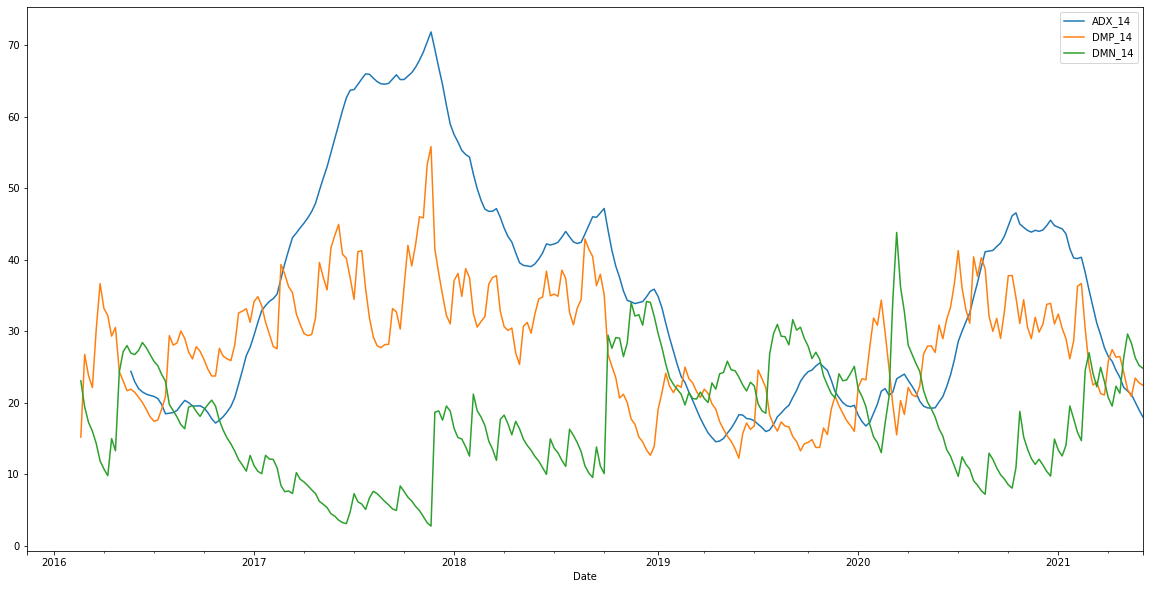

In [22]:
ema21_ohlc4 = ta.ema(ta.ohlc4(hist1_stock["Open"], hist1_stock["High"], hist1_stock["Low"], hist1_stock["Close"]), length=21)
ema08_ohlc4 = ta.ema(ta.ohlc4(hist1_stock["Open"], hist1_stock["High"], hist1_stock["Low"], hist1_stock["Close"]), length=8)
#df_closing_prices.plot(figsize = (20,10))
candles = ta.ha(hist1_stock["Open"], hist1_stock["High"], hist1_stock["Low"], hist1_stock["Close"], offset=None)
bbands = ta.bbands(hist1_stock["Close"], length=20, std=None, mamode='ema', offset=None)
squeeze = ta.squeeze(hist1_stock["High"], hist1_stock["Low"], hist1_stock["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr = ta.atr(hist1_stock["High"], hist1_stock["Low"], hist1_stock["Close"], length=14, mamode="ema", drift=1, offset=0)
kc = ta.kc(hist1_stock["High"], hist1_stock["Low"], hist1_stock["Close"], length=21, scalar=2, mamode='ema', offset=0)
adx = ta.adx(hist1_stock["High"], hist1_stock["Low"], hist1_stock["Close"], length=14, scalar=100, drift=1, offset=0)

#fig = plt.figure()
bbands['BBL_20_2.0'].plot(figsize = (20,10))
bbands['BBU_20_2.0'].plot(figsize = (20,10))
candles['HA_close'].plot(figsize = (20,10))
ema21_ohlc4.plot(figsize = (20,10))
ema08_ohlc4.plot(figsize = (20,10))
kc['KCLe_21_2.0'].plot(figsize = (20,10))
kc['KCUe_21_2.0'].plot(figsize = (20,10))
tr.plot(figsize = (20,10))
adx.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

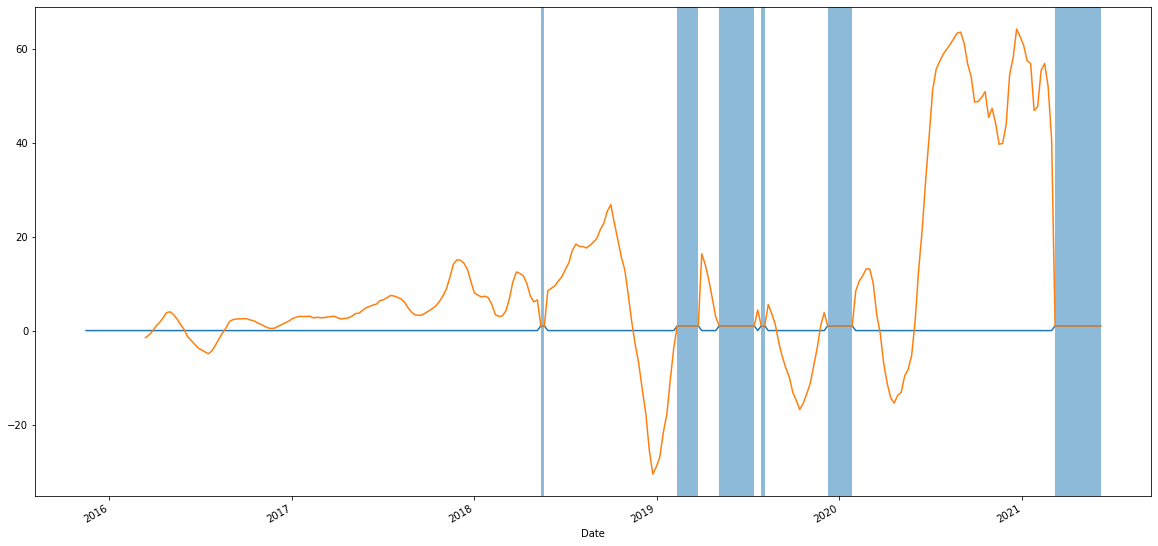

In [23]:
squeeze[squeeze['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(hist1_stock.index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_dis = plt.plot(hist1_stock.index, squeeze['SQZ_ON'])
squeeze_on_dis

squeeze['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

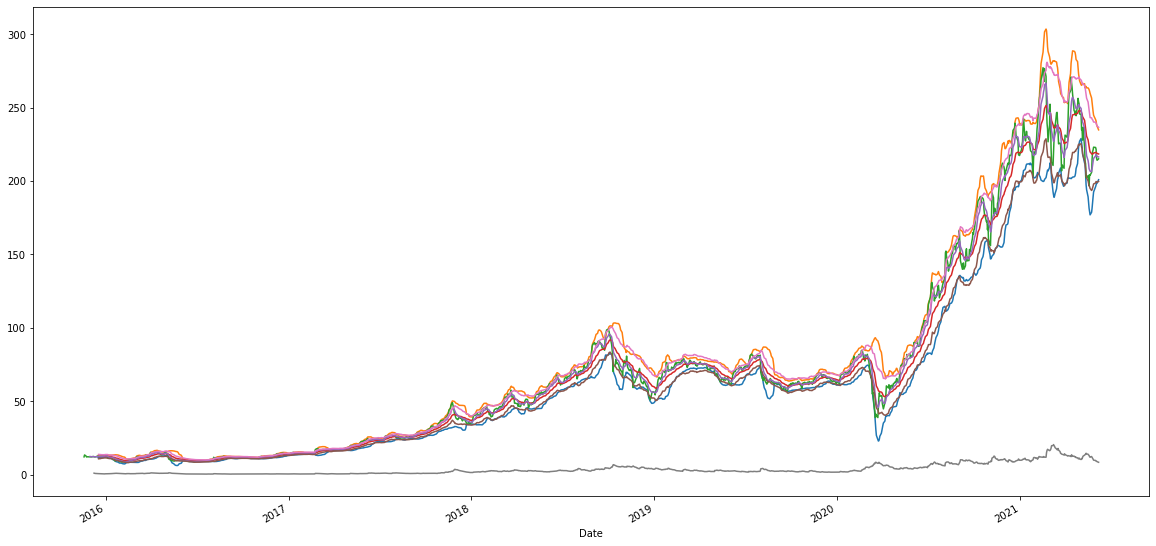

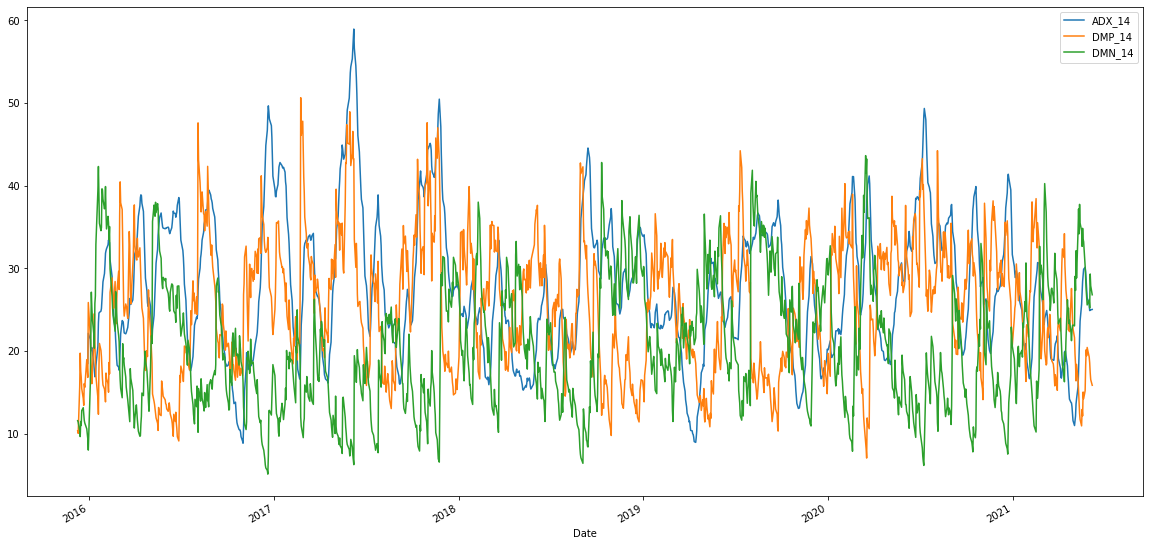

In [25]:
ema21_ohlc4 = ta.ema(ta.ohlc4(hist2_stock["Open"], hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"]), length=21)
ema08_ohlc4 = ta.ema(ta.ohlc4(hist2_stock["Open"], hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"]), length=8)
#df_closing_prices.plot(figsize = (20,10))
candles = ta.ha(hist2_stock["Open"], hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"], offset=None)
bbands = ta.bbands(hist2_stock["Close"], length=20, std=None, mamode='ema', offset=None)
squeeze = ta.squeeze(hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
squeeze1 = ta.squeeze(hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=1.5, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
squeeze2 = ta.squeeze(hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=1, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr = ta.atr(hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"], length=14, mamode="ema", drift=1, offset=0)
kc = ta.kc(hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"], length=21, scalar=2, mamode='ema', offset=0)
adx = ta.adx(hist2_stock["High"], hist2_stock["Low"], hist2_stock["Close"], length=14, scalar=100, drift=1, offset=0)

#fig = plt.figure()
bbands['BBL_20_2.0'].plot(figsize = (20,10))
bbands['BBU_20_2.0'].plot(figsize = (20,10))
candles['HA_close'].plot(figsize = (20,10))
ema21_ohlc4.plot(figsize = (20,10))
ema08_ohlc4.plot(figsize = (20,10))
kc['KCLe_21_2.0'].plot(figsize = (20,10))
kc['KCUe_21_2.0'].plot(figsize = (20,10))
tr.plot(figsize = (20,10))
adx.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

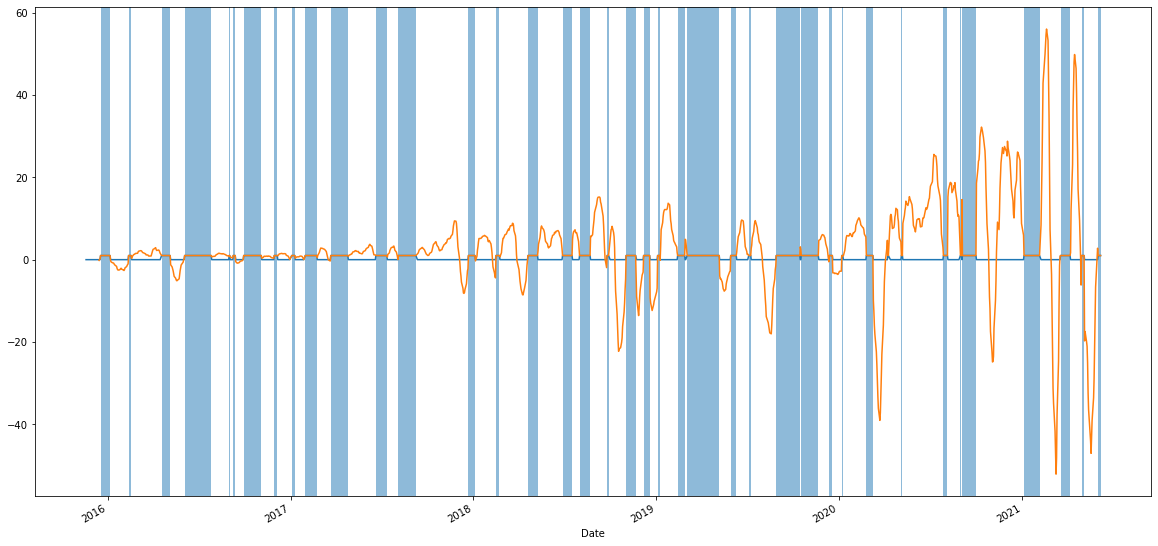

In [26]:
squeeze[squeeze['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(hist2_stock.index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_dis = plt.plot(hist2_stock.index, squeeze['SQZ_ON'])
squeeze_on_dis

squeeze['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))


<AxesSubplot:xlabel='Date'>

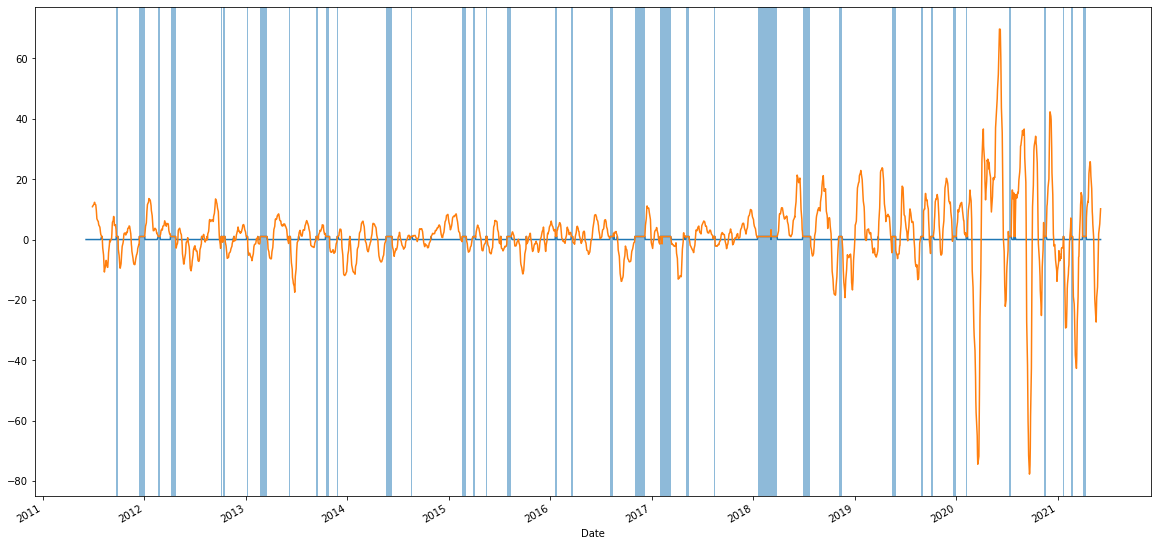

In [47]:
squeeze1[squeeze1['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(hist2_stock.index, 0, 1, where=squeeze1['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_dis_1 = plt.plot(hist2_stock.index, squeeze1['SQZ_ON'])
squeeze_on_dis_1

squeeze1['SQZ_20_2.0_21_1.5'].plot(figsize = (20,10))


<AxesSubplot:xlabel='Date'>

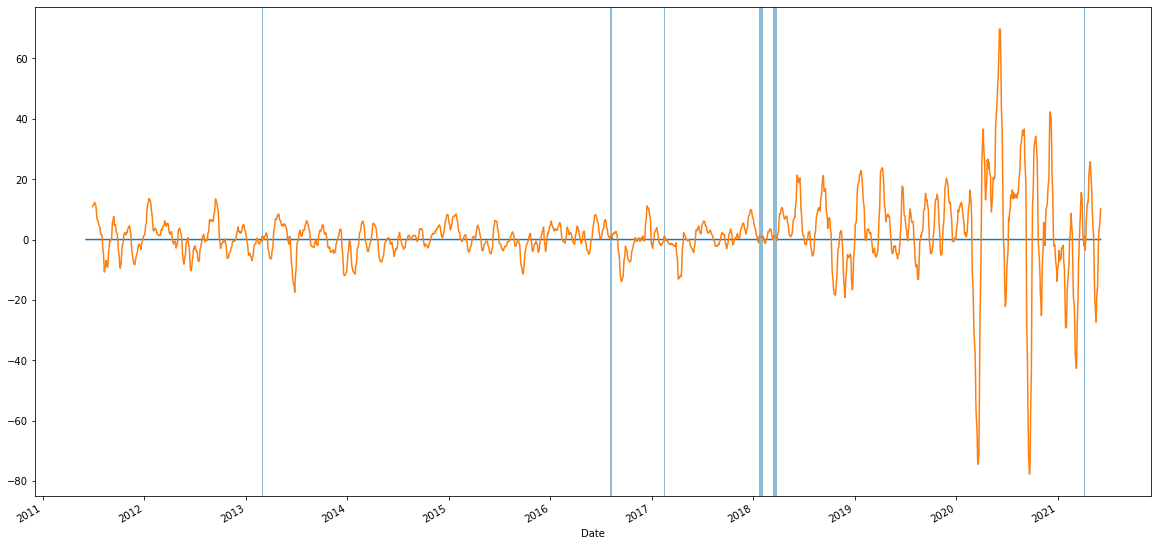

In [48]:
squeeze2[squeeze2['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(hist2_stock.index, 0, 1, where=squeeze2['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_dis_2 = plt.plot(hist2_stock.index, squeeze2['SQZ_ON'])
squeeze_on_dis_2

squeeze2['SQZ_20_2.0_21_1.0'].plot(figsize = (20,10))

In [52]:
squeeze_on_dis
squeeze_on_dis_1
#squeeze_on_dis_2

#squeeze['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))
#squeeze1['SQZ_20_2.0_21_1.5'].plot(figsize = (20,10))
#squeeze2['SQZ_20_2.0_21_1.0'].plot(figsize = (20,10))

In [26]:
ema21_ohlc4 = ta.ema(ta.ohlc4(hist["Open"], hist["High"], hist["Low"], hist["Close"]), length=21)
kc1 = ta.kc(hist["High"], hist["Low"], hist["Close"], length=21, scalar=2, mamode='ema', offset=0)
kc2 = ta.kc(hist["High"], hist["Low"], hist["Close"], length=21, scalar=1.5, mamode='ema', offset=0)
kc3 = ta.kc(hist["High"], hist["Low"], hist["Close"], length=21, scalar=1, mamode='ema', offset=0)
bbands = ta.bbands(hist["Close"], length=20, std=None, mamode=None, offset=None)

In [28]:
if (bbands['BBL_20_2.0'] >= kc1['KCLe_21_2.0']) and (bbands['BBU_20_2.0'] <= kc1['KCUe_21_2.0']):
    sqzOnWide  = True

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<AxesSubplot:xlabel='Date'>

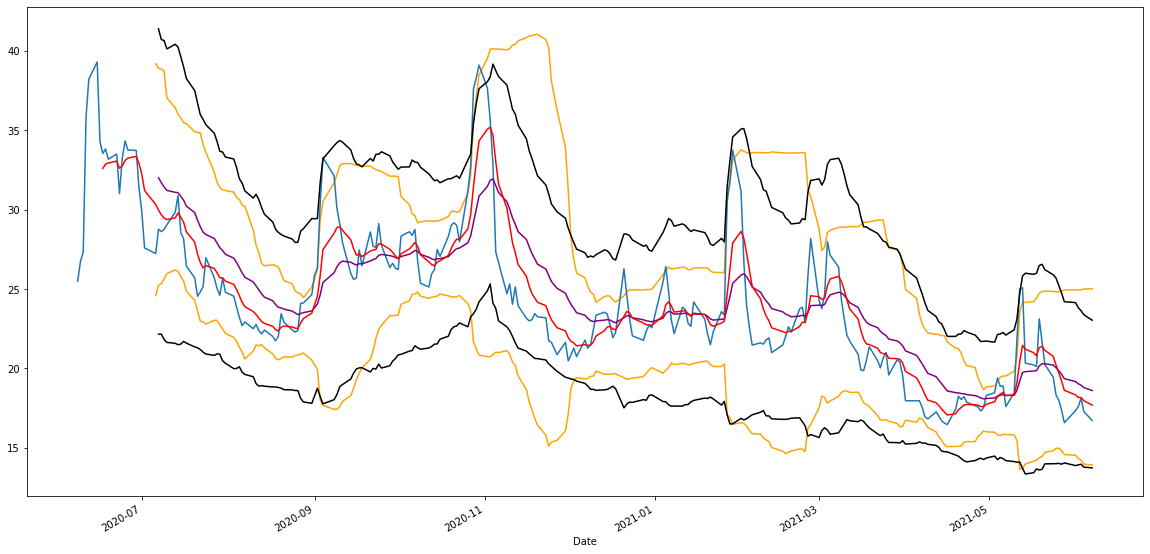

In [37]:
ema21_ohlc4_1 = ta.ema(ta.ohlc4(hist_vix["Open"], hist_vix["High"], hist_vix["Low"], hist_vix["Close"]), length=21)
ema08_ohlc4_1 = ta.ema(ta.ohlc4(hist_vix["Open"], hist_vix["High"], hist_vix["Low"], hist_vix["Close"]), length=8)
#df_closing_prices.plot(figsize = (20,10))
candles_1 = ta.ha(hist_vix["Open"], hist_vix["High"], hist_vix["Low"], hist_vix["Close"], offset=None)
bbands_1 = ta.bbands(hist_vix["Close"], length=20, std=None, mamode=None, offset=None)
squeeze_1 = ta.squeeze(hist_vix["High"], hist_vix["Low"], hist_vix["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr_1 = ta.atr(hist_vix["High"], hist_vix["Low"], hist_vix["Close"], length=14, mamode="ema", drift=1, offset=0)
kc_1 = ta.kc(hist_vix["High"], hist_vix["Low"], hist_vix["Close"], length=21, scalar=2, mamode='ema', offset=0)

fig = plt.figure()
bbands_1['BBL_20_2.0'].plot(figsize = (20,10), color='orange')
bbands_1['BBU_20_2.0'].plot(figsize = (20,10), color='orange')
candles_1['HA_close'].plot(figsize = (20,10))
ema21_ohlc4_1.plot(figsize = (20,10), color='purple')
ema08_ohlc4_1.plot(figsize = (20,10), color='red')
kc_1['KCLe_21_2.0'].plot(figsize = (20,10), color='black')
kc_1['KCUe_21_2.0'].plot(figsize = (20,10), color='black')

<AxesSubplot:xlabel='Date'>

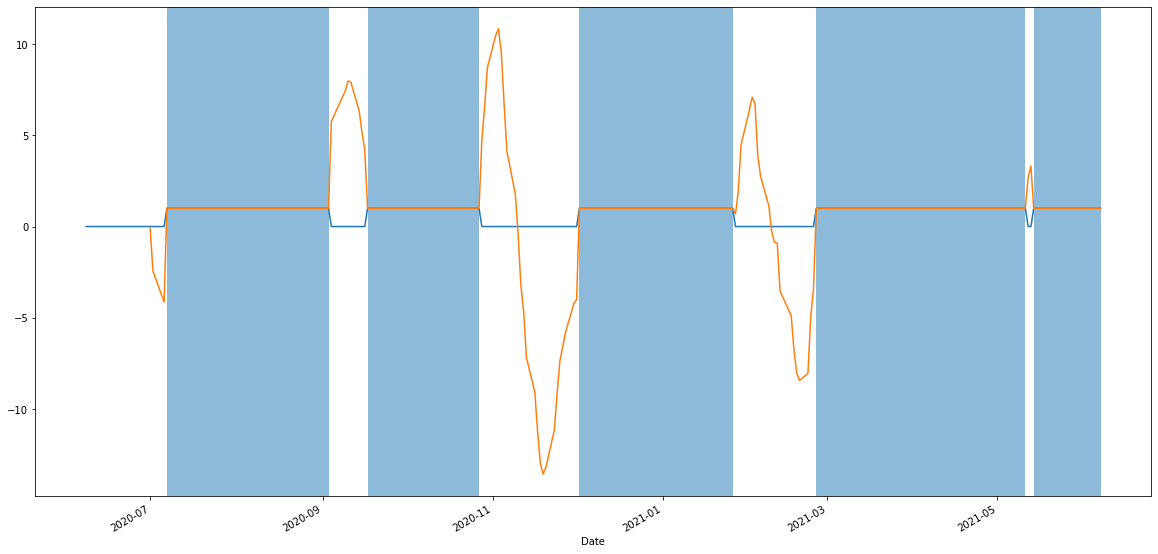

In [32]:
squeeze_1[squeeze_1['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(hist_vix.index, 0, 1, where=squeeze_1['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_vix = plt.plot(hist_vix.index, squeeze_1['SQZ_ON'])
squeeze_on_vix

squeeze_1['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))

In [58]:
help(ta.cdl_inside)

Help on function cdl_inside in module pandas_ta.candles.cdl_inside:

cdl_inside(open_, high, low, close, asbool=False, offset=None, **kwargs)
    Candle Type: Inside Bar
    
    An Inside Bar is a bar that is engulfed by the prior highs and lows of it's
    previous bar. In other words, the current bar is smaller than it's previous bar.
    Set asbool=True if you want to know if it is an Inside Bar. Note by default
    asbool=False so this returns a 0 if it is not an Inside Bar, 1 if it is an
    Inside Bar and close > open, and -1 if it is an Inside Bar but close < open.
    
    Sources:
        https://www.tradingview.com/script/IyIGN1WO-Inside-Bar/
    
    Calculation:
        Default Inputs:
            asbool=False
        inside = (high.diff() < 0) & (low.diff() > 0)
    
        if not asbool:
            inside *= candle_color(open_, close)
    
    Args:
        open_ (pd.Series): Series of 'open's
        high (pd.Series): Series of 'high's
        low (pd.Series): Series 

In [38]:
hist2_stock.head()

Open   High    Low  Close    Volume  Dividends  Stock Splits
Date                                                                     
2015-11-19  11.20  14.78   9.00  13.07  47466100          0             0
2015-11-20  13.92  14.05  12.50  12.85  16550300          0             0
2015-11-23  13.00  13.15  12.10  12.12   5172200          0             0
2015-11-24  12.00  12.23  11.52  12.02   4714700          0             0
2015-11-25  12.12  12.40  11.85  11.90   3583400          0             0

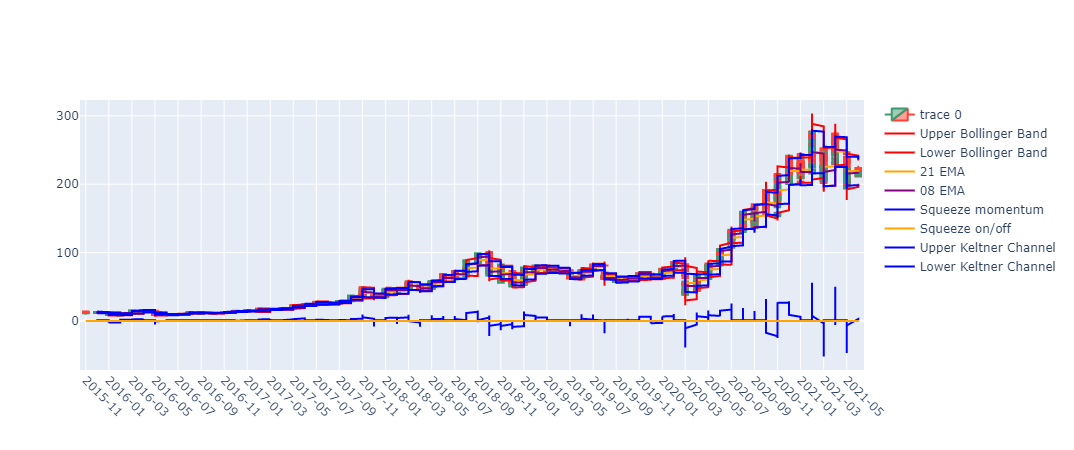

In [42]:
hist2_stock.index = pd.to_datetime(hist2_stock.index, format = '%Y/%m').strftime('%Y-%m')
candlestick = go.Candlestick(x=hist2_stock.index, open=hist2_stock['Open'], high=hist2_stock['High'], low=hist2_stock['Low'],
                close=hist2_stock['Close'])
upper_band = go.Scatter(x=hist2_stock.index, y=bbands['BBU_20_2.0'], name='Upper Bollinger Band', line={'color': 'red'})
lower_band = go.Scatter(x=hist2_stock.index, y=bbands['BBL_20_2.0'], name='Lower Bollinger Band', line={'color': 'red'})
ema21_sq = go.Scatter(x=hist2_stock.index, y=ema21_ohlc4, name='21 EMA', line={'color': 'orange'})
ema08_sq = go.Scatter(x=hist2_stock.index, y=ema08_ohlc4, name='08 EMA', line={'color': 'purple'})
squeeze_plot = go.Scatter(x=hist2_stock.index, y=squeeze['SQZ_20_2.0_21_2.0'], name='Squeeze momentum', line={'color': 'blue'})
squeeze_fire = go.Scatter(x=hist2_stock.index, y=squeeze['SQZ_ON'], name='Squeeze on/off', line={'color': 'orange'})
upper_keltner = go.Scatter(x=hist2_stock.index, y=kc['KCUe_21_2.0'], name='Upper Keltner Channel', line={'color': 'blue'})
lower_keltner = go.Scatter(x=hist2_stock.index, y=kc['KCLe_21_2.0'], name='Lower Keltner Channel', line={'color': 'blue'})


fig = go.Figure(data=[candlestick, upper_band, lower_band, ema21_sq, ema08_sq, squeeze_plot, squeeze_fire, upper_keltner, lower_keltner])
fig.layout.xaxis.type = 'category'
fig.layout.xaxis.rangeslider.visible = False
fig.update_xaxes(tickangle=45)
fig.show()

In [ ]:
# Create a Title for the Dashboard
title = 'Analysis of Stocks'
welcome_tab = pn.Row(pn.Column(title), neighborhood_map())

market_analysis_row = pn.Row(housing_units_per_year(), average_gross_rent(), average_sales_price(), sunburst())

# Create a tab layout for the dashboard
neighborhood_analysis_tab = pn.Column(interact(average_price_by_neighborhood, neighborhood=neighborhood_choice),
    top_most_expensive_neighborhoods(),
    most_expensive_neighborhoods_rent_sales()
)

parallel_plots_tab = pn.Column( 
    parallel_categories(),
    parallel_coordinates()
)



# Create the dashboard
SF_dashboard = pn.Tabs(("Welcome", welcome_tab), 
("Yearly Market Analysis", market_analysis_row),
("Neighborhood Analysis", neighborhood_analysis_tab), 
("Interactive Market Analysis by Neighborhood", parallel_plots_tab))